In [1]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

import warnings
warnings.filterwarnings('ignore')

# pa pintar
import seaborn as sns
import matplotlib.pyplot as plt

# para que salga el grafica
%matplotlib inline

In [2]:
muestra = pd.read_csv('./predicting-airbnb-prices/muestra.csv')
muestra.head()

,id,log_price
0,0,1.68677
1,1,8.01927
2,2,4.94568
3,3,7.51119
4,4,9.80191


In [3]:
test = pd.read_csv('./predicting-airbnb-prices/test.csv')
test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,20332537,Condominium,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,2.5,Real Bed,moderate,True,LA,Spacious and quiet master bedroom and two bedr...,2016-03-23,t,t,100%,2014-08-23,f,2017-02-18,34.087167,-118.122115,Cozy Condominium,Alhambra,7,93.0,https://a0.muscache.com/im/pictures/62134148-b...,91801,3.0,4.0
1,10653901,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Kitchen,""Indoor firepl...",4,1.5,Real Bed,moderate,True,LA,"Hip Venice loft with 20 foot ceilings, plenty ...",2013-08-16,t,t,100%,2012-08-18,f,2017-04-18,33.994951,-118.467552,"AK Venice Loft, Roof deck, yard, bikes @ 21 Palms",Venice,50,97.0,NaN,90291,1.0,1.0
2,21173707,Dorm,Shared room,"{Internet,""Wireless Internet"",Kitchen,Heating,...",1,NaN,Real Bed,strict,False,SF,My home is very communal. Students and interns...,2012-07-04,t,f,100%,2011-05-10,f,2017-09-22,37.794184,-122.405819,Shelli's Student Home4(1 Month Min),Chinatown,6,100.0,https://a0.muscache.com/im/pictures/5676690/30...,94108,1.0,1.0
3,16861419,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",2,1.0,Real Bed,flexible,False,SF,Large and comfortable extra bedroom in large 3...,NaN,t,t,NaN,2013-10-12,f,NaN,37.775893,-122.425973,Large bedroom in Hayes Valley,Hayes Valley,0,NaN,https://a0.muscache.com/im/pictures/a201a661-a...,94102,1.0,1.0
4,16411627,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,Boston,"Centrally located to all Universities, Hospita...",2013-10-07,t,t,100%,2011-06-13,f,2017-10-05,42.348399,-71.156963,Large 1Bed w/ Gorgeous Kitchen + Bath,Allston-Brighton,49,87.0,https://a0.muscache.com/im/pictures/27186847/d...,02135,1.0,2.0


In [4]:
test.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
test.shape

(14823, 28)

In [6]:
train = pd.read_csv('./predicting-airbnb-prices/train.csv')
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,15148661,4.499810,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,NYC,A great spacious apartment in an awesome and c...,2016-07-25,t,t,80%,2015-11-04,f,2017-09-10,40.757349,-73.921339,Sunny Spacious Apt in Astoria w/ back yard access,Astoria,9,96.0,https://a0.muscache.com/im/pictures/3e40924b-7...,11101,1.0,1.0
1,1227528,3.970292,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Futon,strict,True,NYC,Newly Renovated Two Bedroom Apartment in Hamil...,2016-09-01,t,t,NaN,2014-08-26,f,2017-01-05,40.823556,-73.954573,Manhattan Sunny Private Room,Hamilton Heights,8,100.0,https://a0.muscache.com/im/pictures/2953dddd-0...,10031,1.0,1.0
2,15692740,4.787492,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",""Wheel...",4,1.0,Real Bed,moderate,True,NYC,"One bedroom, one bathroom apartment, with an o...",2016-01-05,t,t,100%,2011-01-29,f,2017-09-27,40.689306,-73.955478,Sweet Apartment on Quiet Block,Bedford-Stuyvesant,12,100.0,NaN,11205,1.0,1.0
3,19115685,4.700480,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",3,NaN,Real Bed,moderate,False,NYC,"Comfy, art- and book-filled one-bedroom apartm...",2014-01-06,t,f,NaN,2011-10-26,f,2014-01-13,40.681965,-73.965490,Husband & Wife Art-Filled Apartment,Clinton Hill,2,90.0,https://a0.muscache.com/im/pictures/81766960/b...,11238.0,1.0,1.0
4,2554110,5.192957,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,strict,True,NYC,1br/1ba. Spacious living room with plenty of s...,2016-05-20,t,f,NaN,2012-06-21,f,2016-05-20,40.742842,-73.957554,Luxurious 1 Bedroom Apt!,Long Island City,1,80.0,https://a0.muscache.com/im/pictures/0ed6ee9e-6...,11101,1.0,1.0


In [7]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [8]:
train.shape

(59288, 29)

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59288.0,1.125616e+07,6.086810e+06,344.000000,6.259172e+06,1.223218e+07,1.640644e+07,2.123090e+07
log_price,59288.0,4.782881e+00,7.195730e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,59288.0,3.154247e+00,2.148722e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,59139.0,1.236333e+00,5.843585e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,59288.0,3.844318e+01,3.078562e+00,33.339002,3.412843e+01,4.066128e+01,4.074583e+01,4.239044e+01
longitude,59288.0,-9.244513e+01,2.171925e+01,-122.511500,-1.183433e+02,-7.699810e+01,-7.395475e+01,-7.098505e+01
number_of_reviews,59288.0,2.086380e+01,3.783484e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,45922.0,9.408795e+01,7.828948e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,59211.0,1.265187e+00,8.528050e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,59188.0,1.712154e+00,1.255901e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01


### Valores nulos?

In [10]:
nan_cols = train.isna().sum()
nan_cols[nan_cols>0]

bathrooms                   149
first_review              12687
host_has_profile_pic        140
host_identity_verified      140
host_response_rate        14628
host_since                  140
last_review               12660
neighbourhood              5523
review_scores_rating      13366
thumbnail_url              6622
zipcode                     755
bedrooms                     77
beds                        100
dtype: int64

In [11]:
# lleno los valores nulos con la mediana

train['bathrooms'].fillna(train['bathrooms'].median(), inplace=True)
train['bedrooms'].fillna(train['bedrooms'].median(), inplace=True)
train['beds'].fillna(train['beds'].median(), inplace=True)

In [12]:
nan_cols = train.isna().sum()
nan_cols[nan_cols>0]

first_review              12687
host_has_profile_pic        140
host_identity_verified      140
host_response_rate        14628
host_since                  140
last_review               12660
neighbourhood              5523
review_scores_rating      13366
thumbnail_url              6622
zipcode                     755
dtype: int64

In [13]:
train.shape

(59288, 29)

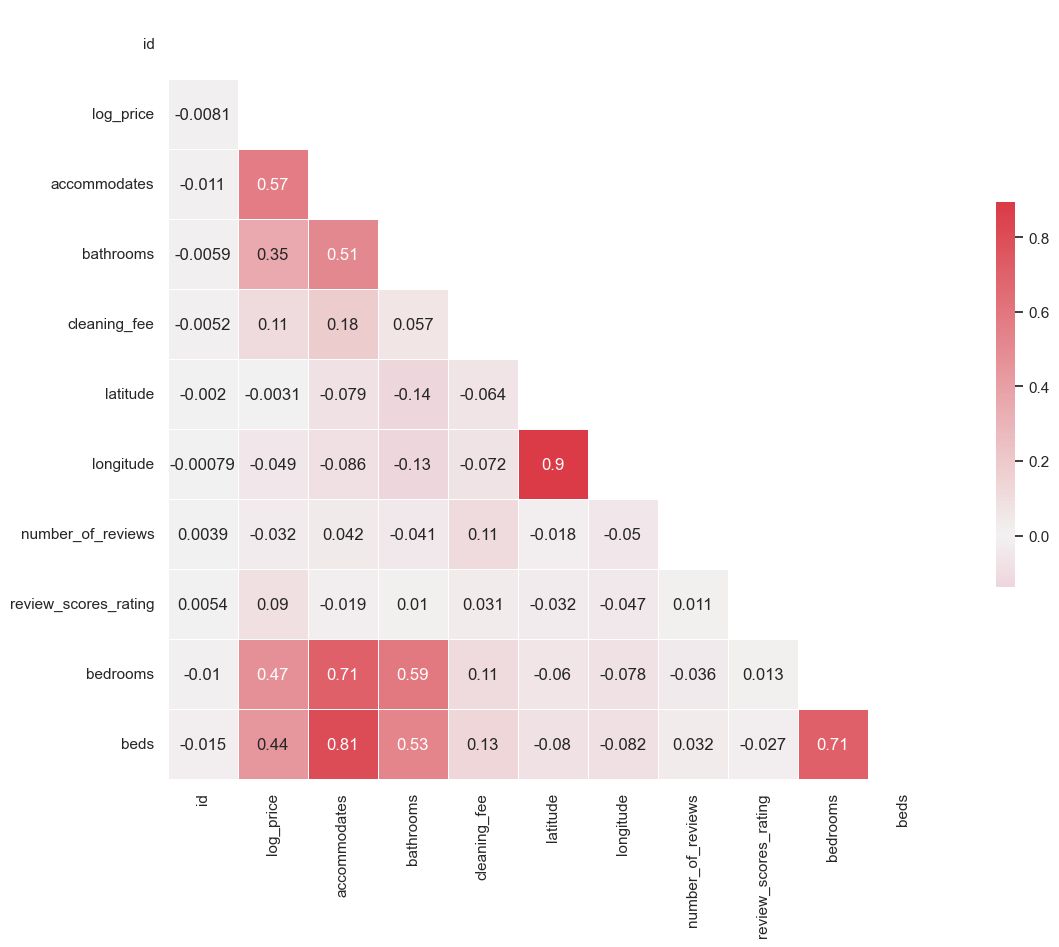

In [14]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(train.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(train.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [15]:
corr_price = train.corr()['log_price']
corr_price

id                     -0.008087
log_price               1.000000
accommodates            0.569208
bathrooms               0.354779
cleaning_fee            0.112264
latitude               -0.003146
longitude              -0.048869
number_of_reviews      -0.031848
review_scores_rating    0.089891
bedrooms                0.473761
beds                    0.441529
Name: log_price, dtype: float64

### 2. Codificación de Variables Categóricas:

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59288 entries, 0 to 59287
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      59288 non-null  int64  
 1   log_price               59288 non-null  float64
 2   property_type           59288 non-null  object 
 3   room_type               59288 non-null  object 
 4   amenities               59288 non-null  object 
 5   accommodates            59288 non-null  int64  
 6   bathrooms               59288 non-null  float64
 7   bed_type                59288 non-null  object 
 8   cancellation_policy     59288 non-null  object 
 9   cleaning_fee            59288 non-null  bool   
 10  city                    59288 non-null  object 
 11  description             59288 non-null  object 
 12  first_review            46601 non-null  object 
 13  host_has_profile_pic    59148 non-null  object 
 14  host_identity_verified  59148 non-null

In [17]:
train['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [18]:
# Aplica one-hot encoding a la variable 'room_type'
train = pd.get_dummies(train, columns=['room_type'], prefix='room_type')
train.head()

,id,log_price,property_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,15148661,4.499810,Apartment,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,NYC,A great spacious apartment in an awesome and c...,2016-07-25,t,t,80%,2015-11-04,f,2017-09-10,40.757349,-73.921339,Sunny Spacious Apt in Astoria w/ back yard access,Astoria,9,96.0,https://a0.muscache.com/im/pictures/3e40924b-7...,11101,1.0,1.0,1,0,0
1,1227528,3.970292,Apartment,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Futon,strict,True,NYC,Newly Renovated Two Bedroom Apartment in Hamil...,2016-09-01,t,t,NaN,2014-08-26,f,2017-01-05,40.823556,-73.954573,Manhattan Sunny Private Room,Hamilton Heights,8,100.0,https://a0.muscache.com/im/pictures/2953dddd-0...,10031,1.0,1.0,0,1,0
2,15692740,4.787492,Apartment,"{""Wireless Internet"",""Air conditioning"",""Wheel...",4,1.0,Real Bed,moderate,True,NYC,"One bedroom, one bathroom apartment, with an o...",2016-01-05,t,t,100%,2011-01-29,f,2017-09-27,40.689306,-73.955478,Sweet Apartment on Quiet Block,Bedford-Stuyvesant,12,100.0,NaN,11205,1.0,1.0,1,0,0
3,19115685,4.700480,Apartment,"{Internet,""Wireless Internet"",""Air conditionin...",3,1.0,Real Bed,moderate,False,NYC,"Comfy, art- and book-filled one-bedroom apartm...",2014-01-06,t,f,NaN,2011-10-26,f,2014-01-13,40.681965,-73.965490,Husband & Wife Art-Filled Apartment,Clinton Hill,2,90.0,https://a0.muscache.com/im/pictures/81766960/b...,11238.0,1.0,1.0,1,0,0
4,2554110,5.192957,Apartment,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,strict,True,NYC,1br/1ba. Spacious living room with plenty of s...,2016-05-20,t,f,NaN,2012-06-21,f,2016-05-20,40.742842,-73.957554,Luxurious 1 Bedroom Apt!,Long Island City,1,80.0,https://a0.muscache.com/im/pictures/0ed6ee9e-6...,11101,1.0,1.0,1,0,0


In [19]:
train['bed_type'].unique()

array(['Real Bed', 'Futon', 'Airbed', 'Couch', 'Pull-out Sofa'],
      dtype=object)

In [20]:
train['property_type'].unique()

# Veo que son muchas columnas únicas y que teniendo la columna 'room_type', puede sobrarnos como dato. LA ELIMINO. 

array(['Apartment', 'House', 'Other', 'Condominium', 'Bed & Breakfast',
       'Loft', 'Townhouse', 'Bungalow', 'Earth House', 'Villa', 'Boat',
       'Vacation home', 'Guesthouse', 'Cabin', 'In-law', 'Boutique hotel',
       'Timeshare', 'Yurt', 'Serviced apartment', 'Tent', 'Camper/RV',
       'Guest suite', 'Dorm', 'Hostel', 'Castle', 'Cave', 'Hut',
       'Lighthouse', 'Chalet', 'Treehouse', 'Train', 'Tipi',
       'Casa particular', 'Island'], dtype=object)

In [21]:
# Elimina la columna 'property_type'

train = train.drop('property_type', axis=1)

In [22]:
train['cancellation_policy'].unique()

# haré una fusión en la que cambio 'super_strict_30' y 'super_strict_60'

array(['flexible', 'strict', 'moderate', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [23]:
# Fusiono categorías

train['cancellation_policy'] = train['cancellation_policy'].replace(['super_strict_30', 'super_strict_60'], 'super_strict')

# Verifica los cambios
train['cancellation_policy'].unique()

array(['flexible', 'strict', 'moderate', 'super_strict'], dtype=object)

In [24]:
# Aplica one-hot encoding a la variable 'room_type'
train = pd.get_dummies(train, columns=['cancellation_policy'], prefix='cancellation_policy')
train.head()

,id,log_price,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict
0,15148661,4.499810,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,True,NYC,A great spacious apartment in an awesome and c...,2016-07-25,t,t,80%,2015-11-04,f,2017-09-10,40.757349,-73.921339,Sunny Spacious Apt in Astoria w/ back yard access,Astoria,9,96.0,https://a0.muscache.com/im/pictures/3e40924b-7...,11101,1.0,1.0,1,0,0,1,0,0,0
1,1227528,3.970292,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Futon,True,NYC,Newly Renovated Two Bedroom Apartment in Hamil...,2016-09-01,t,t,NaN,2014-08-26,f,2017-01-05,40.823556,-73.954573,Manhattan Sunny Private Room,Hamilton Heights,8,100.0,https://a0.muscache.com/im/pictures/2953dddd-0...,10031,1.0,1.0,0,1,0,0,0,1,0
2,15692740,4.787492,"{""Wireless Internet"",""Air conditioning"",""Wheel...",4,1.0,Real Bed,True,NYC,"One bedroom, one bathroom apartment, with an o...",2016-01-05,t,t,100%,2011-01-29,f,2017-09-27,40.689306,-73.955478,Sweet Apartment on Quiet Block,Bedford-Stuyvesant,12,100.0,NaN,11205,1.0,1.0,1,0,0,0,1,0,0
3,19115685,4.700480,"{Internet,""Wireless Internet"",""Air conditionin...",3,1.0,Real Bed,False,NYC,"Comfy, art- and book-filled one-bedroom apartm...",2014-01-06,t,f,NaN,2011-10-26,f,2014-01-13,40.681965,-73.965490,Husband & Wife Art-Filled Apartment,Clinton Hill,2,90.0,https://a0.muscache.com/im/pictures/81766960/b...,11238.0,1.0,1.0,1,0,0,0,1,0,0
4,2554110,5.192957,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,True,NYC,1br/1ba. Spacious living room with plenty of s...,2016-05-20,t,f,NaN,2012-06-21,f,2016-05-20,40.742842,-73.957554,Luxurious 1 Bedroom Apt!,Long Island City,1,80.0,https://a0.muscache.com/im/pictures/0ed6ee9e-6...,11101,1.0,1.0,1,0,0,0,0,1,0


In [25]:
# Aplica one-hot encoding a la variable 'room_type'

train = pd.get_dummies(train, columns=['bed_type'], prefix='bed_type')
train.head()

,id,log_price,amenities,accommodates,bathrooms,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,15148661,4.499810,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,True,NYC,A great spacious apartment in an awesome and c...,2016-07-25,t,t,80%,2015-11-04,f,2017-09-10,40.757349,-73.921339,Sunny Spacious Apt in Astoria w/ back yard access,Astoria,9,96.0,https://a0.muscache.com/im/pictures/3e40924b-7...,11101,1.0,1.0,1,0,0,1,0,0,0,0,0,0,0,1
1,1227528,3.970292,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,True,NYC,Newly Renovated Two Bedroom Apartment in Hamil...,2016-09-01,t,t,NaN,2014-08-26,f,2017-01-05,40.823556,-73.954573,Manhattan Sunny Private Room,Hamilton Heights,8,100.0,https://a0.muscache.com/im/pictures/2953dddd-0...,10031,1.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0
2,15692740,4.787492,"{""Wireless Internet"",""Air conditioning"",""Wheel...",4,1.0,True,NYC,"One bedroom, one bathroom apartment, with an o...",2016-01-05,t,t,100%,2011-01-29,f,2017-09-27,40.689306,-73.955478,Sweet Apartment on Quiet Block,Bedford-Stuyvesant,12,100.0,NaN,11205,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
3,19115685,4.700480,"{Internet,""Wireless Internet"",""Air conditionin...",3,1.0,False,NYC,"Comfy, art- and book-filled one-bedroom apartm...",2014-01-06,t,f,NaN,2011-10-26,f,2014-01-13,40.681965,-73.965490,Husband & Wife Art-Filled Apartment,Clinton Hill,2,90.0,https://a0.muscache.com/im/pictures/81766960/b...,11238.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
4,2554110,5.192957,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,True,NYC,1br/1ba. Spacious living room with plenty of s...,2016-05-20,t,f,NaN,2012-06-21,f,2016-05-20,40.742842,-73.957554,Luxurious 1 Bedroom Apt!,Long Island City,1,80.0,https://a0.muscache.com/im/pictures/0ed6ee9e-6...,11101,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1


In [26]:
# A la columna 'host_response_rate' le elimino % para tener una columna numérica.

In [27]:
train['host_response_rate'] = train['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [28]:
# A la columna 'review_scores_rating' la cambio a una columna numérica.

train['review_scores_rating'] = train['review_scores_rating'].astype(float)

In [29]:
train.shape

(59288, 37)

In [30]:
train['host_response_rate'].head()

0    0.8
1    NaN
2    1.0
3    NaN
4    NaN
Name: host_response_rate, dtype: float64

In [31]:
# Relleno ahora los nulos de la columna con "0"

train['host_response_rate'].fillna('0', inplace=True)

In [32]:
# Convierto la columna a tipo float

train['host_response_rate'] = train['host_response_rate'].astype(float)

In [33]:
train['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59288 entries, 0 to 59287
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
59288 non-null  float64
dtypes: float64(1)
memory usage: 463.3 KB


In [34]:
train['bathrooms'] = train['bathrooms'].astype(int)

In [35]:
train.dtypes

id                                    int64
log_price                           float64
amenities                            object
accommodates                          int64
bathrooms                             int64
cleaning_fee                           bool
city                                 object
description                          object
first_review                         object
host_has_profile_pic                 object
host_identity_verified               object
host_response_rate                  float64
host_since                           object
instant_bookable                     object
last_review                          object
latitude                            float64
longitude                           float64
name                                 object
neighbourhood                        object
number_of_reviews                     int64
review_scores_rating                float64
thumbnail_url                        object
zipcode                         

- Elimino aquellas columnas categóricas que me interrumpen y que no me van a servir para el estudio del precio:
    - 'thumbnail_url', 'zipcode', 'amenities', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified,'host_since', 'last_review', 'name', 'neighbourhood', 'cleaning_fee'.

In [36]:
columns_to_drop = ['thumbnail_url', 'zipcode', 'amenities', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified']
train = train.drop(columns=columns_to_drop)

In [37]:
columns_to_drop = ['host_since', 'last_review', 'name', 'neighbourhood', 'cleaning_fee']
train = train.drop(columns=columns_to_drop)

In [38]:
train.head()

,id,log_price,accommodates,bathrooms,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,15148661,4.499810,2,1,0.8,f,40.757349,-73.921339,9,96.0,1.0,1.0,1,0,0,1,0,0,0,0,0,0,0,1
1,1227528,3.970292,2,1,0.0,f,40.823556,-73.954573,8,100.0,1.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0
2,15692740,4.787492,4,1,1.0,f,40.689306,-73.955478,12,100.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
3,19115685,4.700480,3,1,0.0,f,40.681965,-73.965490,2,90.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
4,2554110,5.192957,3,1,0.0,f,40.742842,-73.957554,1,80.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1


In [39]:
train['instant_bookable'].value_counts()

f    43805
t    15483
Name: instant_bookable, dtype: int64

In [40]:
train['instant_bookable'] = train['instant_bookable'].map({'f': 0, 't': 1})

In [41]:
train['instant_bookable'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59288 entries, 0 to 59287
Series name: instant_bookable
Non-Null Count  Dtype
--------------  -----
59288 non-null  int64
dtypes: int64(1)
memory usage: 463.3 KB


In [42]:
train['instant_bookable'].value_counts()

0    43805
1    15483
Name: instant_bookable, dtype: int64

In [43]:
train.dtypes

id                                    int64
log_price                           float64
accommodates                          int64
bathrooms                             int64
host_response_rate                  float64
instant_bookable                      int64
latitude                            float64
longitude                           float64
number_of_reviews                     int64
review_scores_rating                float64
bedrooms                            float64
beds                                float64
room_type_Entire home/apt             uint8
room_type_Private room                uint8
room_type_Shared room                 uint8
cancellation_policy_flexible          uint8
cancellation_policy_moderate          uint8
cancellation_policy_strict            uint8
cancellation_policy_super_strict      uint8
bed_type_Airbed                       uint8
bed_type_Couch                        uint8
bed_type_Futon                        uint8
bed_type_Pull-out Sofa          

In [44]:
train.shape

(59288, 24)

In [45]:
# VALORES NULOS

In [46]:
nan_cols = train.isna().sum()
nan_cols[nan_cols>0]

review_scores_rating    13366
dtype: int64

In [47]:
corr_price = train.corr()['log_price']
corr_price

id                                 -0.008087
log_price                           1.000000
accommodates                        0.569208
bathrooms                           0.346281
host_response_rate                 -0.043109
instant_bookable                   -0.047163
latitude                           -0.003146
longitude                          -0.048869
number_of_reviews                  -0.031848
review_scores_rating                0.089891
bedrooms                            0.473761
beds                                0.441529
room_type_Entire home/apt           0.602867
room_type_Private room             -0.532104
room_type_Shared room              -0.221928
cancellation_policy_flexible       -0.094663
cancellation_policy_moderate       -0.051450
cancellation_policy_strict          0.128730
cancellation_policy_super_strict    0.052277
bed_type_Airbed                    -0.047904
bed_type_Couch                     -0.041391
bed_type_Futon                     -0.065185
bed_type_P

Elimino la columna 'review_scores_rating'. Tiene bastantes valores nulos por lo que la voy a borrar, ya que la columna tampoco tiene una correlación demasiado elevada con la columna 'log_price'.

In [48]:
train = train.drop('review_scores_rating', axis=1)

In [49]:
train.head()

,id,log_price,accommodates,bathrooms,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,15148661,4.499810,2,1,0.8,0,40.757349,-73.921339,9,1.0,1.0,1,0,0,1,0,0,0,0,0,0,0,1
1,1227528,3.970292,2,1,0.0,0,40.823556,-73.954573,8,1.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0
2,15692740,4.787492,4,1,1.0,0,40.689306,-73.955478,12,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
3,19115685,4.700480,3,1,0.0,0,40.681965,-73.965490,2,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
4,2554110,5.192957,3,1,0.0,0,40.742842,-73.957554,1,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1


In [50]:
train.shape

(59288, 23)

In [51]:
nan_cols = train.isna().sum()
nan_cols[nan_cols>0]

# ya no tenemos nulos

Series([], dtype: int64)

 ### Visualización de Distribuciones y Relaciones:

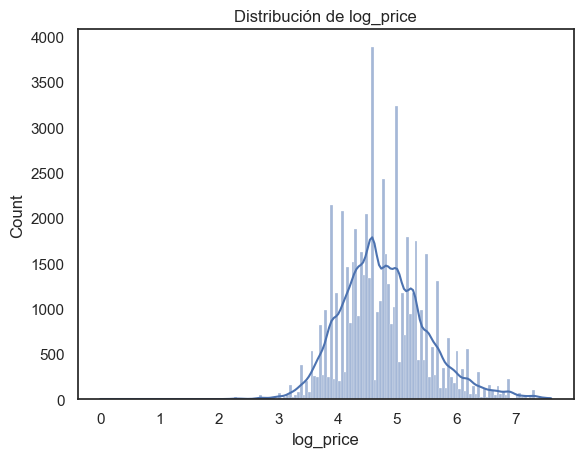

In [52]:
# Visualización de Distribucion es y Relaciones
sns.histplot(train['log_price'], kde=True)
plt.title('Distribución de log_price')
plt.show()

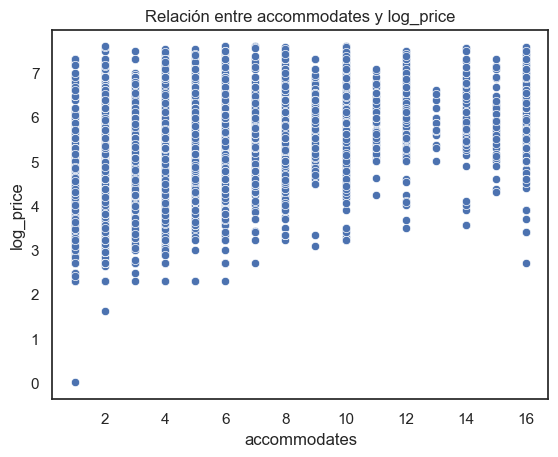

In [53]:
sns.scatterplot(x='accommodates', y='log_price', data=train)
plt.title('Relación entre accommodates y log_price')
plt.show()

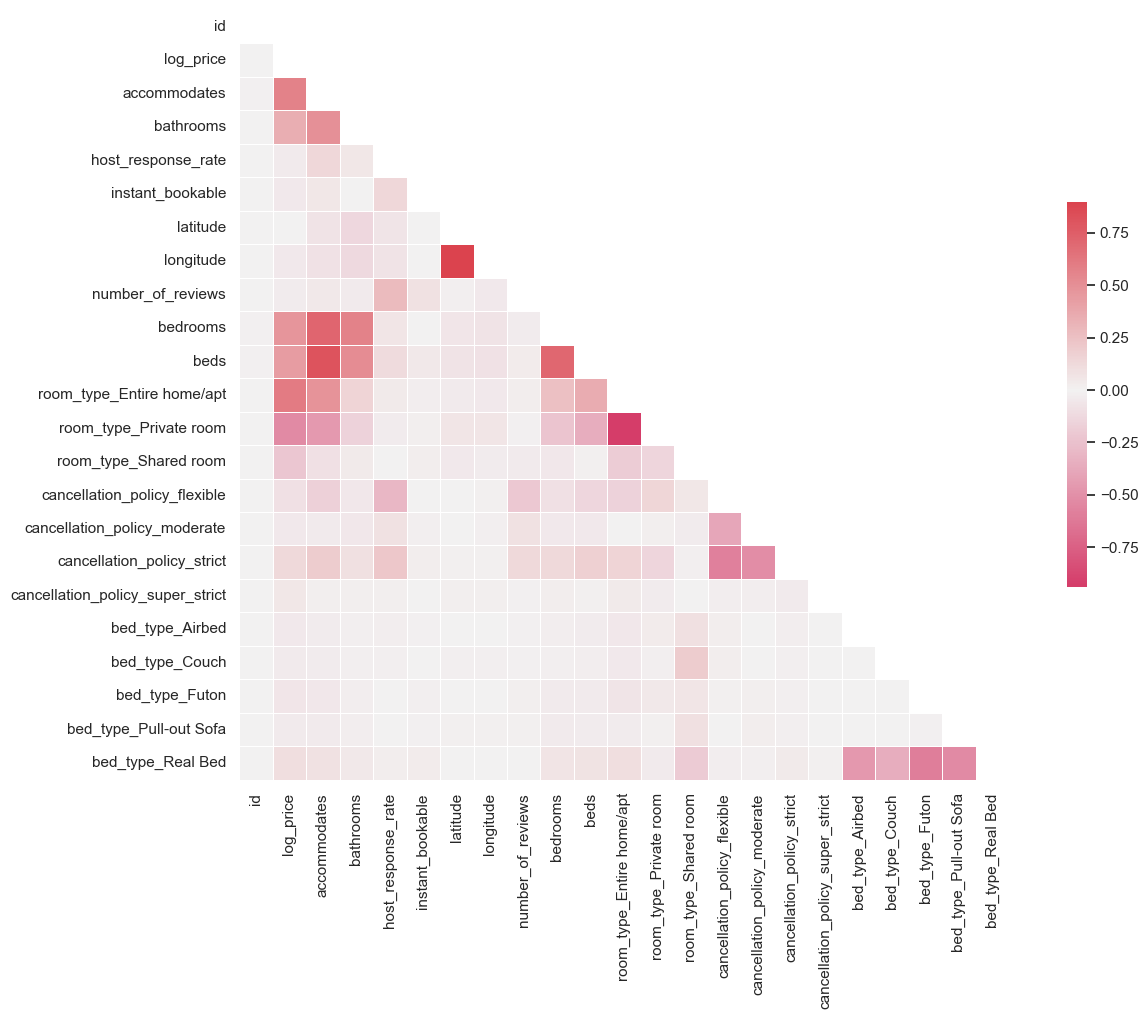

In [54]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(train.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(train.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=False,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [55]:
corr_price = train.corr()['log_price']
corr_price

id                                 -0.008087
log_price                           1.000000
accommodates                        0.569208
bathrooms                           0.346281
host_response_rate                 -0.043109
instant_bookable                   -0.047163
latitude                           -0.003146
longitude                          -0.048869
number_of_reviews                  -0.031848
bedrooms                            0.473761
beds                                0.441529
room_type_Entire home/apt           0.602867
room_type_Private room             -0.532104
room_type_Shared room              -0.221928
cancellation_policy_flexible       -0.094663
cancellation_policy_moderate       -0.051450
cancellation_policy_strict          0.128730
cancellation_policy_super_strict    0.052277
bed_type_Airbed                    -0.047904
bed_type_Couch                     -0.041391
bed_type_Futon                     -0.065185
bed_type_Pull-out Sofa             -0.039536
bed_type_R

**Comentarios de la correlacion con el precio**

- **'accommodates'** (0.569208): La cantidad de personas que puede alojar un lugar tiene una correlación positiva significativa con el precio. Es lógico esperar que lugares más grandes tiendan a tener precios más altos.
- **'bathrooms'** (0.346281): El número de baños también muestra una correlación positiva. Lugares con más baños tienden a tener precios más altos.
- **'bedrooms'** (0.473761) y **'beds'** (0.441529): La cantidad de habitaciones y camas tiene una correlación positiva sólida con el precio. Al igual que con 'accommodates', esto sugiere que lugares más grandes tienden a ser más caros.
- **'room_type_Entire home/apt'** (0.602867): Tener un lugar completo o un apartamento tiene una correlación positiva fuerte con el precio. Esto tiene sentido, ya que los lugares completos suelen ser más caros que las habitaciones privadas o compartidas.
- **'room_type_Private room'** (-0.532104): La correlación negativa sugiere que tener una habitación privada en lugar de un lugar completo tiende a estar asociado con precios más bajos.
- **'room_type_Shared room'** (-0.221928): Las habitaciones compartidas tienen una correlación negativa, lo que significa que tienden a tener precios más bajos.
- **'cancellation_policy_flexible'** (-0.094663): Tener una política de cancelación flexible está relacionado con precios más bajos.
- **'cancellation_policy_strict'** (0.128730): Por el contrario, una política de cancelación estricta muestra una correlación positiva con precios más altos.
- **'instant_bookable'** (-0.047163): La capacidad de reserva instantánea está relacionada con precios más bajos, aunque la correlación es bastante débil.

#### DIVISION DE LOS DATOS

In [56]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [57]:
# 1. División de datos
# Definir X e y 
 
X = train.drop('log_price', axis=1)

y = train['log_price']

In [58]:
X_train, X_test, y_train, y_test = tts(X, y,
                                    train_size=0.8,
                                    test_size=0.2,
                                    random_state=42
                                    )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47430, 22), (11858, 22), (47430,), (11858,))

In [59]:
# 2. Regresión Lineal -- hacemos así la predicción: y_pred

linreg = LinReg()  # Inicializa el modelo

linreg.fit(X_train, y_train)  # Ajusta el modelo

LinearRegression()

In [60]:
# 3. Coeficientes e intercept
intercept = linreg.intercept_  # beta0, ordenada en el origen
coefficients = linreg.coef_  # betas, desde 1 hasta N

In [61]:
intercept, coefficients

(1.8407764091585874,
 array([-2.68958476e-10,  8.82463129e-02,  1.40125491e-01, -1.50966008e-01,
        -4.41601343e-02,  4.73265509e-02, -5.90546301e-03, -3.52487613e-04,
         1.50203679e-01, -5.25540132e-02,  5.67203204e-01, -4.91865776e-02,
        -5.18016626e-01, -1.01452522e-01, -1.41961647e-01, -9.73819605e-02,
         3.40796129e-01, -3.42860244e-02,  8.80655647e-02, -6.23584658e-02,
         1.94464553e-02, -1.08675298e-02]))

In [62]:
dict(zip(X_train.columns, linreg.coef_))

{'id': -2.6895847579028267e-10,
 'accommodates': 0.08824631290269508,
 'bathrooms': 0.14012549058761853,
 'host_response_rate': -0.15096600795644488,
 'instant_bookable': -0.044160134307717806,
 'latitude': 0.04732655093929704,
 'longitude': -0.005905463010343781,
 'number_of_reviews': -0.0003524876127663501,
 'bedrooms': 0.15020367909209717,
 'beds': -0.05255401317080795,
 'room_type_Entire home/apt': 0.5672032036892675,
 'room_type_Private room': -0.04918657756787217,
 'room_type_Shared room': -0.5180166261213934,
 'cancellation_policy_flexible': -0.1014525221488709,
 'cancellation_policy_moderate': -0.14196164657652133,
 'cancellation_policy_strict': -0.09738196048390453,
 'cancellation_policy_super_strict': 0.34079612920929697,
 'bed_type_Airbed': -0.03428602443969089,
 'bed_type_Couch': 0.08806556473035385,
 'bed_type_Futon': -0.06235846575224723,
 'bed_type_Pull-out Sofa': 0.01944645527252328,
 'bed_type_Real Bed': -0.010867529810939271}

In [63]:
train.columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'host_response_rate',
       'instant_bookable', 'latitude', 'longitude', 'number_of_reviews',
       'bedrooms', 'beds', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict',
       'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed'],
      dtype='object')

### Evaluación

-  Una vez hemos entrenado al modelo "train", entonces usamos el csv de "test" que ya hemos limpiado y al cual le he hecho las mismas transformaciones que a "train" para predecir los precios.

In [64]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [65]:
test2 = pd.read_csv('test2.csv')

In [66]:
test2.head()

,id,accommodates,bathrooms,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,20332537,6,2,1.0,0,34.087167,-118.122115,7,3.0,4.0,1,0,0,0,1,0,0,0,0,0,0,1
1,10653901,4,1,1.0,0,33.994951,-118.467552,50,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
2,21173707,1,1,1.0,0,37.794184,-122.405819,6,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0,1
3,16861419,2,1,0.0,0,37.775893,-122.425973,0,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,1
4,16411627,4,1,1.0,0,42.348399,-71.156963,49,1.0,2.0,1,0,0,0,1,0,0,0,0,0,0,1


In [67]:
# Ahora, que ya tenemos los datos de ambos df, hacemos la predicción del precio con el csv limpio de "test" 

In [68]:
test_precio = linreg.predict(test2)

test_precio[:10]

array([5.45716606, 4.9829245 , 3.89328739, 4.59978732, 5.04512334,
       5.19446261, 5.60860832, 4.17586179, 5.0731902 , 5.37235895])

In [70]:
#muestra = pd.read_csv('./predicting-airbnb-prices/muestra.csv')
#muestra.head()

,id,log_price
0,0,1.68677
1,1,8.01927
2,2,4.94568
3,3,7.51119
4,4,9.80191


In [71]:
#muestra['log_price'] = test_precio

In [72]:
muestra.head()

,id,log_price
0,0,5.457166
1,1,4.982925
2,2,3.893287
3,3,4.599787
4,4,5.045123


In [73]:
test2.shape

(14823, 22)

In [74]:
train.shape

(59288, 23)

In [75]:
muestra.shape

(14823, 2)

In [76]:
#muestra.to_csv('test3.csv', index=False)